In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

df = pd.read_csv("raw_data/bronze_train.csv")

In [47]:
df.isna().sum()

unit            0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
T2              0
T24             0
T30             0
T50             0
P2              0
P15             0
P30             0
Nf              0
Nc              0
epr             0
Ps30            0
phi             0
NRf             0
NRc             0
BPR             0
farB            0
htBleed         0
Nf_dmd          0
PCNfR_dmd       0
W31             0
W32             0
failure_type    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unit          160359 non-null  int64  
 1   cycle         160359 non-null  int64  
 2   op_setting_1  160359 non-null  float64
 3   op_setting_2  160359 non-null  float64
 4   op_setting_3  160359 non-null  float64
 5   T2            160359 non-null  float64
 6   T24           160359 non-null  float64
 7   T30           160359 non-null  float64
 8   T50           160359 non-null  float64
 9   P2            160359 non-null  float64
 10  P15           160359 non-null  float64
 11  P30           160359 non-null  float64
 12  Nf            160359 non-null  float64
 13  Nc            160359 non-null  float64
 14  epr           160359 non-null  float64
 15  Ps30          160359 non-null  float64
 16  phi           160359 non-null  float64
 17  NRf           160359 non-null  float64
 18  NRc 

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
list(df.columns)

['unit',
 'cycle',
 'op_setting_1',
 'op_setting_2',
 'op_setting_3',
 'T2',
 'T24',
 'T30',
 'T50',
 'P2',
 'P15',
 'P30',
 'Nf',
 'Nc',
 'epr',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'farB',
 'htBleed',
 'Nf_dmd',
 'PCNfR_dmd',
 'W31',
 'W32',
 'failure_type']

In [51]:
df = pd.read_parquet("datamart/silver/silver_feature_rolling.parquet")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   unit                       160359 non-null  int32  
 1   cycle                      160359 non-null  int32  
 2   op_setting_1               160359 non-null  float32
 3   op_setting_2               160359 non-null  float32
 4   op_setting_3               160359 non-null  float32
 5   T2                         160359 non-null  float32
 6   T24                        160359 non-null  float32
 7   T30                        160359 non-null  float32
 8   T50                        160359 non-null  float32
 9   P2                         160359 non-null  float32
 10  P15                        160359 non-null  float32
 11  P30                        160359 non-null  float32
 12  Nf                         160359 non-null  float32
 13  Nc                         16

In [53]:
df.shape

(160359, 98)

In [54]:
df.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3          T2  \
0     3      1        0.0008        0.0005         100.0  518.669983   
1     3      2       -0.0010        0.0000         100.0  518.669983   
2     3      3        0.0013       -0.0002         100.0  518.669983   
3     3      4        0.0008       -0.0002         100.0  518.669983   
4     3      5        0.0020        0.0004         100.0  518.669983   

          T24          T30          T50     P2  ...  Nf_dmd_delta  \
0  642.039978  1584.199951  1398.130005  14.62  ...           0.0   
1  642.659973  1587.040039  1398.619995  14.62  ...           0.0   
2  642.070007  1580.750000  1401.099976  14.62  ...           0.0   
3  642.500000  1580.119995  1395.760010  14.62  ...           0.0   
4  641.969971  1581.479980  1394.050049  14.62  ...           0.0   

   PCNfR_dmd_rolling_mean  PCNfR_dmd_rolling_std  PCNfR_dmd_delta  \
0                   100.0                    0.0              0.0   
1                   100.0                    0.0              0.0   
2                   100.0                    0.0              0.0   
3                   100.0                    0.0              0.0   
4                   100.0                    0.0              0.0   

   W31_rolling_mean  W31_rolling_std  W31_delta  W32_rolling_mean  \
0         38.959999         0.000000   0.000000         23.320499   
1         39.014999         0.077782   0.110001         23.378699   
2         39.019999         0.055678  -0.040001         23.357866   
3         38.999999         0.060553  -0.090000         23.390925   
4         38.980000         0.068920  -0.039997         23.396540   

   W32_rolling_std  W32_delta  
0         0.000000   0.000000  
1         0.082307   0.116400  
2         0.068478  -0.120699  
3         0.086589   0.173901  
4         0.076032  -0.071100  

[5 rows x 98 columns]

In [55]:
df.columns

Index(['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'T2',
       'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd',
       'W31', 'W32', 'op_setting_1_rolling_mean', 'op_setting_1_rolling_std',
       'op_setting_1_delta', 'op_setting_2_rolling_mean',
       'op_setting_2_rolling_std', 'op_setting_2_delta',
       'op_setting_3_rolling_mean', 'op_setting_3_rolling_std',
       'op_setting_3_delta', 'T2_rolling_mean', 'T2_rolling_std', 'T2_delta',
       'T24_rolling_mean', 'T24_rolling_std', 'T24_delta', 'T30_rolling_mean',
       'T30_rolling_std', 'T30_delta', 'T50_rolling_mean', 'T50_rolling_std',
       'T50_delta', 'P2_rolling_mean', 'P2_rolling_std', 'P2_delta',
       'P15_rolling_mean', 'P15_rolling_std', 'P15_delta', 'P30_rolling_mean',
       'P30_rolling_std', 'P30_delta', 'Nf_rolling_mean', 'Nf_rolling_std',
       'Nf_delta', 'Nc_rolling_mean', 'Nc_rolling_std'

In [56]:
df.loc[:,['unit','cycle']].describe()

unit          cycle
count  160359.000000  160359.000000
mean      370.270050     123.331338
std       203.411987      83.538146
min         1.000000       1.000000
25%       196.000000      57.000000
50%       381.000000     114.000000
75%       547.000000     173.000000
max       709.000000     543.000000

Interpretation: 

When we inspect the descriptive statistics of the unit and cycle columns, we see that the dataset contains a total of 160,359 rows.

There are 709 engines in total, with unit numbers ranging from 1 to 709. The mean unit number (370.27) and the quartiles (25% = 196, 50% = 381, 75% = 547) indicate that the data is fairly well distributed across all engines, though each unit may have a different number of recorded cycles before failure.

The cycle column represents the number of operational cycles the engine has completed up to failure. On average, engines operate for about 123.33 cycles before failing. However, there is a large variation across engines, with a standard deviation of 83.54 cycles. The shortest-lived engine failed after just 1 cycle, while the longest-running engine reached 543 cycles before failure.

The quartiles (25% = 57, 50% = 114, 75% = 173) show that half of the engines failed between roughly 57 and 173 cycles. The large gap between the minimum and maximum values suggests that some engines fail much earlier or later than most — likely due to differences in operating conditions, loads, or inherent variability in performance.

This wide spread implies outliers on both ends — engines that failed unusually early or lasted much longer than the majority. A visualization of the cycle distribution will help further illustrate these differences in engine lifespan.

In [57]:
sensor_columns = [
    'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 
    'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 
    'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'
]

# descriptive statistics (transposed)
df_stats = df.loc[:, sensor_columns].describe().transpose()

# display the table
df_stats

count         mean         std          min          25%  \
T2         160359.0   485.840881   30.420380   445.000000   449.440002   
T24        160359.0   597.360962   42.478516   535.479980   549.960022   
T30        160359.0  1467.035767  118.175262  1242.670044  1357.359985   
T50        160359.0  1260.956421  136.300064  1023.770020  1126.829956   
P2         160359.0     9.895000    4.265554     3.910000     5.480000   
P15        160359.0    14.424935    6.443923     5.670000     8.000000   
P30        160359.0   359.729950  174.133835   136.169998   175.710007   
Nf         160359.0  2273.829590  142.426620  1914.719971  2212.120117   
Nc         160359.0  8677.554688  374.657440  7984.509766  8334.769531   
epr        160359.0     1.153705    0.142103     0.930000     1.020000   
Ps30       160359.0    44.212048    3.426342    36.040001    42.009998   
phi        160359.0   338.789825  164.193481   128.309998   164.789993   
NRf        160359.0  2349.645264  111.167244  2027.569946  2387.969971   
NRc        160359.0  8088.950195   80.623260  7845.779785  8070.529785   
BPR        160359.0     9.054748    0.751581     8.156300     8.439250   
farB       160359.0     0.025185    0.004997     0.020000     0.020000   
htBleed    160359.0   360.698822   31.021429   302.000000   332.000000   
Nf_dmd     160359.0  2273.754150  142.513123  1915.000000  2212.000000   
PCNfR_dmd  160359.0    98.389153    4.656270    84.930000   100.000000   
W31        160359.0    25.942709   11.691422    10.160000    14.330000   
W32        160359.0    15.565701    7.015067     6.010500     8.601300   

                   50%          75%          max  
T2          489.049988   518.669983   518.669983  
T24         605.929993   642.340027   645.109985  
T30        1492.810059  1586.589966  1616.910034  
T50        1271.739990  1402.199951  1441.489990  
P2            9.350000    14.620000    14.620000  
P15          13.660000    21.610001    21.610001  
P30         341.690002   553.289978   570.809998  
Nf         2319.370117  2388.050049  2388.639893  
Nc         8764.200195  9055.849609  9244.589844  
epr           1.090000     1.300000     1.320000  
Ps30         44.930000    47.340000    48.529999  
phi         321.690002   521.340027   537.489990  
NRf        2388.070068  2388.159912  2390.489990  
NRc        8118.589844  8139.410156  8293.719727  
BPR           9.030100     9.344200    11.066900  
farB          0.030000     0.030000     0.030000  
htBleed     367.000000   392.000000   400.000000  
Nf_dmd     2319.000000  2388.000000  2388.000000  
PCNfR_dmd   100.000000   100.000000   100.000000  
W31          24.920000    38.820000    39.889999  
W32          14.953500    23.294600    23.950500

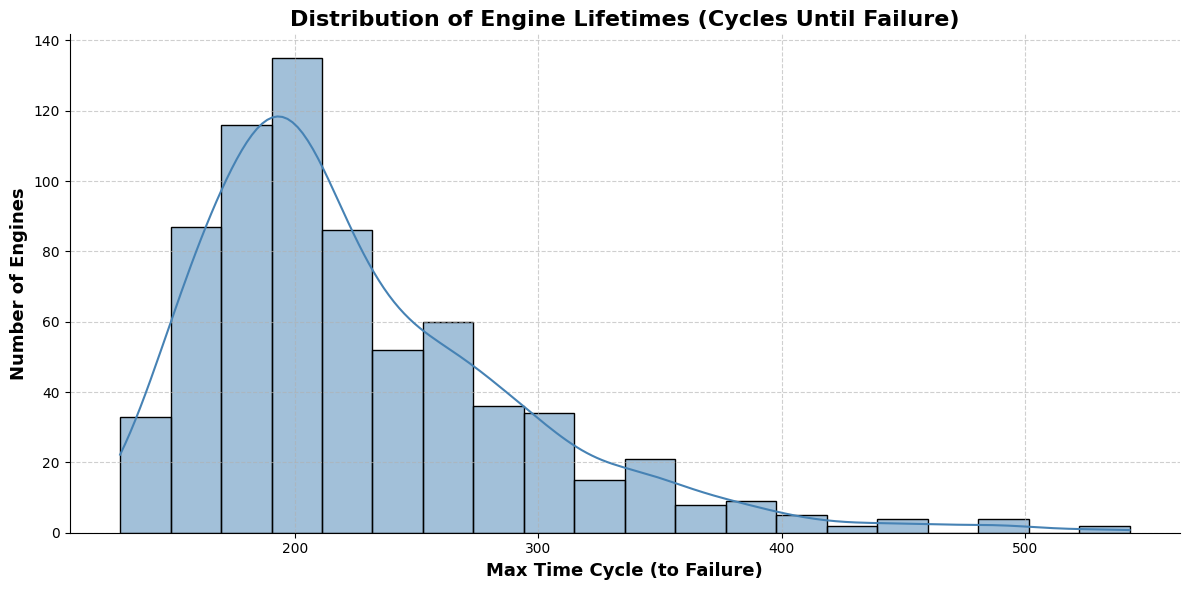

In [58]:
# Group by each engine and find its max cycle (i.e., cycle at failure)
max_time_cycles = df.groupby('unit')[['cycle']].max()

# Distribution of maximum time cycles (engine lifetimes)
sns.displot(
    max_time_cycles['cycle'],
    kde=True,        # adds a smooth density curve
    bins=20,         # number of bins for histogram
    height=6,        # figure height
    aspect=2,        # width-to-height ratio
    color='steelblue'
)

plt.title('Distribution of Engine Lifetimes (Cycles Until Failure)', fontweight='bold', fontsize=16)
plt.xlabel('Max Time Cycle (to Failure)', fontweight='bold', fontsize=13)
plt.ylabel('Number of Engines', fontweight='bold', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Interpretation:

The histogram shows that most engines fail between 150–250 cycles, with a peak around 200 cycles. The distribution is right-skewed, indicating that while most engines fail early, a few last much longer — exceeding 500 cycles.

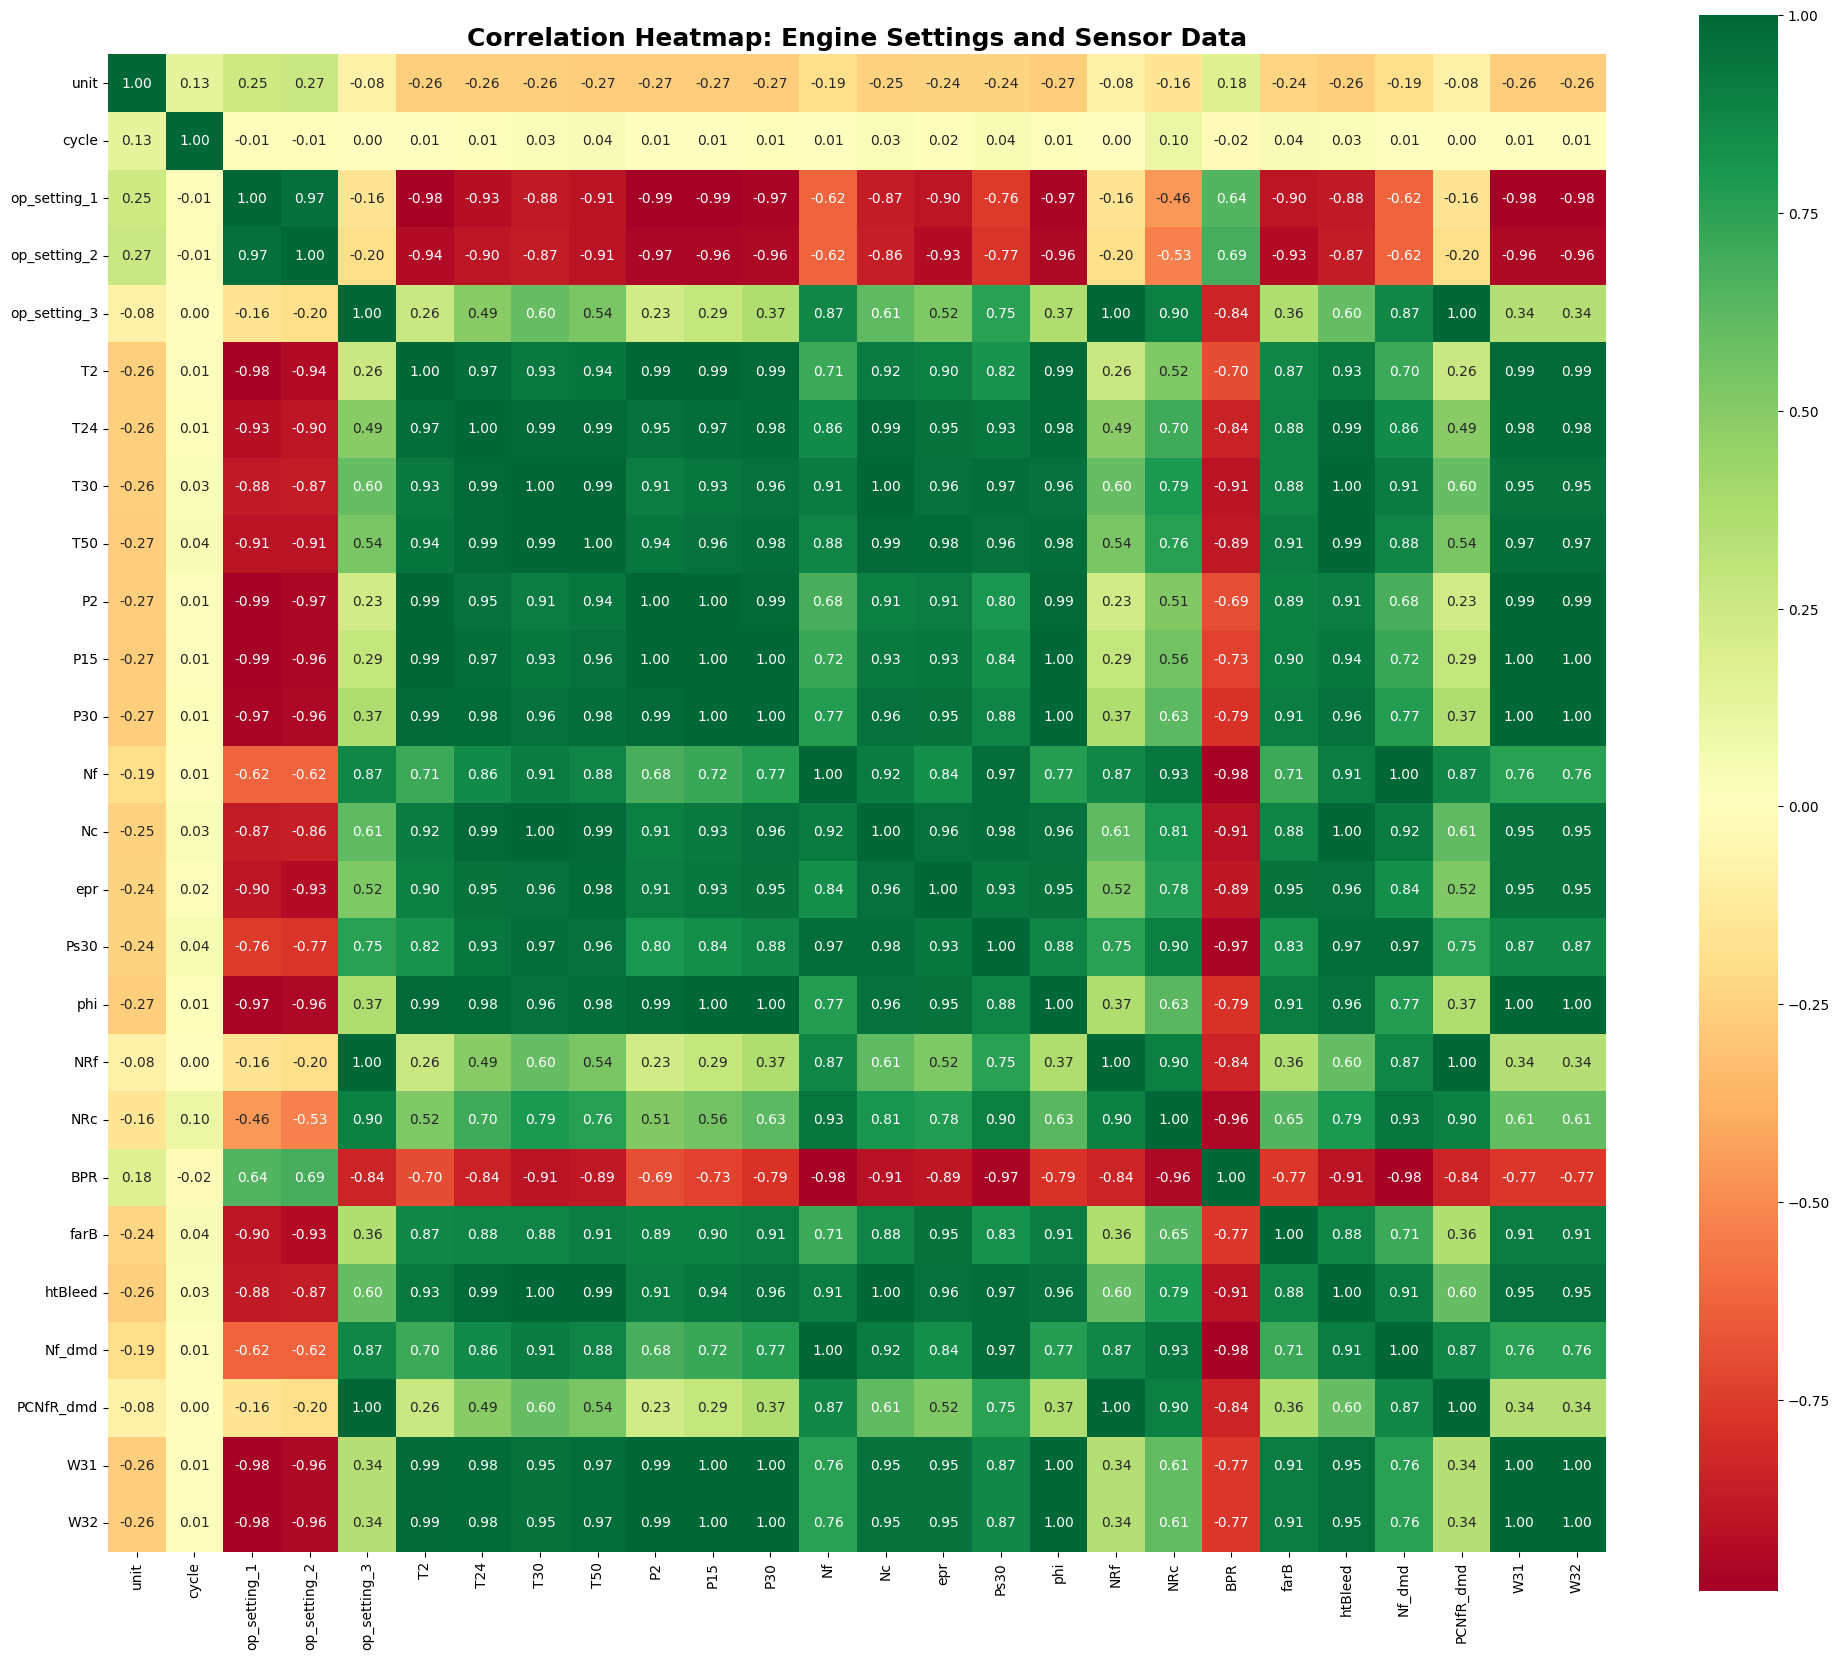

In [61]:
# Define your selected columns
sensor_columns = [
    'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 
    'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 
    'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'
]

# Include unit, cycle, and operation settings
selected_columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + sensor_columns

# Compute correlation matrix for selected columns only
corr = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    annot=True,       # show correlation values
    fmt=".2f",        # format decimals
    cmap='RdYlGn',    # color palette
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap: Engine Settings and Sensor Data", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()

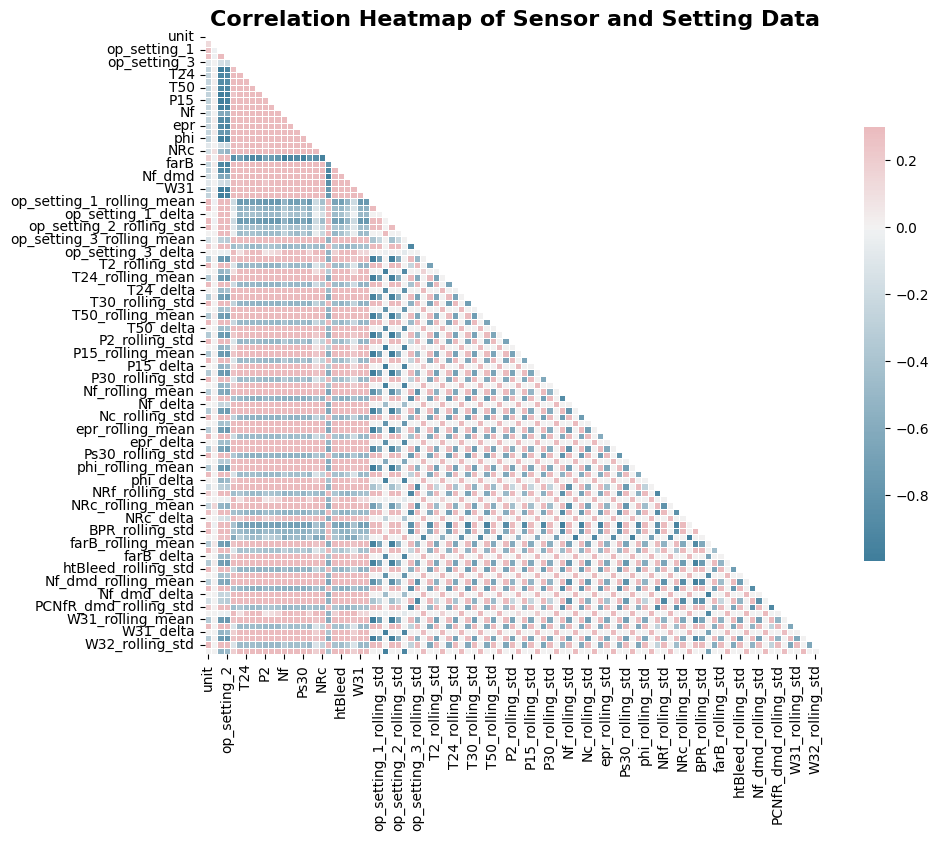

Top 20 Most Correlated Feature Pairs:
PCNfR_dmd                 op_setting_3                1.000000
op_setting_3              PCNfR_dmd                   1.000000
PCNfR_dmd_rolling_std     op_setting_3_rolling_std    1.000000
op_setting_3_rolling_std  PCNfR_dmd_rolling_std       1.000000
NRf_rolling_std           PCNfR_dmd_rolling_std       1.000000
op_setting_3_rolling_std  NRf_rolling_std             1.000000
PCNfR_dmd_rolling_std     NRf_rolling_std             1.000000
NRf_rolling_std           op_setting_3_rolling_std    1.000000
Nf_delta                  Nf_dmd_delta                0.999999
Nf_dmd_delta              Nf_delta                    0.999999
NRf_delta                 PCNfR_dmd_delta             0.999999
PCNfR_dmd_delta           NRf_delta                   0.999999
NRf_delta                 op_setting_3_delta          0.999999
op_setting_3_delta        NRf_delta                   0.999999
Nf_rolling_std            Nf_dmd_rolling_std          0.999999
Nf_dmd_rolling_st

In [ ]:
# Compute correlation matrix (numeric columns only)
corr = df.select_dtypes(include=[np.number]).corr()

# Create a mask for the upper triangle (to make it cleaner)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 10))

# Choose color palette
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap of Sensor and Setting Data", fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Compute correlation matrix (numeric columns only)
corr = df.select_dtypes(include=[np.number]).corr()

# Unstack, sort by absolute correlation, and drop self-correlations
corr_pairs = corr.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # remove self-correlation (1.0)

# Get top 20 strongest correlations
top20_corr = corr_pairs.head(20)

# Print results
print("Top 20 Most Correlated Feature Pairs:")
print(top20_corr)

In [64]:
#Compute RUL to do EDA

def add_RUL_column(df):
    # Group by each engine (unit)
    grouped = df.groupby(by='unit')

    # Find the maximum cycle (i.e., the failure point) for each engine
    max_cycles = grouped['cycle'].max()

    # Merge max cycle back into the main dataframe
    merged = df.merge(max_cycles.to_frame(name='max_cycle'), left_on='unit', right_index=True)

    # Compute Remaining Useful Life (RUL)
    merged['RUL'] = merged['max_cycle'] - merged['cycle']

    # Drop the temporary column
    merged = merged.drop('max_cycle', axis=1)

    return merged

# Apply function
df = add_RUL_column(df)

# Check result
df.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3          T2  \
0     3      1        0.0008        0.0005         100.0  518.669983   
1     3      2       -0.0010        0.0000         100.0  518.669983   
2     3      3        0.0013       -0.0002         100.0  518.669983   
3     3      4        0.0008       -0.0002         100.0  518.669983   
4     3      5        0.0020        0.0004         100.0  518.669983   

          T24          T30          T50     P2  ...  PCNfR_dmd_rolling_mean  \
0  642.039978  1584.199951  1398.130005  14.62  ...                   100.0   
1  642.659973  1587.040039  1398.619995  14.62  ...                   100.0   
2  642.070007  1580.750000  1401.099976  14.62  ...                   100.0   
3  642.500000  1580.119995  1395.760010  14.62  ...                   100.0   
4  641.969971  1581.479980  1394.050049  14.62  ...                   100.0   

   PCNfR_dmd_rolling_std  PCNfR_dmd_delta  W31_rolling_mean  W31_rolling_std  \
0                    0.0              0.0         38.959999         0.000000   
1                    0.0              0.0         39.014999         0.077782   
2                    0.0              0.0         39.019999         0.055678   
3                    0.0              0.0         38.999999         0.060553   
4                    0.0              0.0         38.980000         0.068920   

   W31_delta  W32_rolling_mean  W32_rolling_std  W32_delta  RUL  
0   0.000000         23.320499         0.000000   0.000000  178  
1   0.110001         23.378699         0.082307   0.116400  177  
2  -0.040001         23.357866         0.068478  -0.120699  176  
3  -0.090000         23.390925         0.086589   0.173901  175  
4  -0.039997         23.396540         0.076032  -0.071100  174  

[5 rows x 99 columns]

In [67]:
# Compute max RUL (the final record per engine)
max_rul_u = df.groupby('unit').max().reset_index()

# View the first few rows
max_rul_u.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3          T2  \
0     1    192        0.0047        0.0005         100.0  518.669983   
1     2    287        0.0076        0.0006         100.0  518.669983   
2     3    179        0.0058        0.0005         100.0  518.669983   
3     4    189        0.0059        0.0006         100.0  518.669983   
4     5    269        0.0055        0.0005         100.0  518.669983   

          T24          T30          T50     P2  ...  PCNfR_dmd_rolling_mean  \
0  644.210022  1605.439941  1432.520020  14.62  ...                   100.0   
1  643.940002  1610.099976  1431.170044  14.62  ...                   100.0   
2  643.929993  1606.500000  1438.510010  14.62  ...                   100.0   
3  644.530029  1612.109985  1434.119995  14.62  ...                   100.0   
4  644.020020  1609.410034  1434.589966  14.62  ...                   100.0   

   PCNfR_dmd_rolling_std  PCNfR_dmd_delta  W31_rolling_mean  W31_rolling_std  \
0                    0.0              0.0         39.060001         0.220794   
1                    0.0              0.0         39.144000         0.179999   
2                    0.0              0.0         39.100000         0.167839   
3                    0.0              0.0         39.053999         0.203027   
4                    0.0              0.0         39.154000         0.180195   

   W31_delta  W32_rolling_mean  W32_rolling_std  W32_delta  RUL  
0   0.420002         23.425820         0.090134   0.176701  191  
1   0.439999         23.484980         0.117368   0.219200  286  
2   0.340000         23.433380         0.095985   0.208500  178  
3   0.320000         23.423780         0.105957   0.189400  188  
4   0.400002         23.467521         0.112541   0.204300  268  

[5 rows x 99 columns]

In [72]:
Sensor_dic = {
    'T2': 'Fan Inlet Temperature (°R)',
    'T24': 'LPC Outlet Temperature (°R)',
    'T30': 'HPC Outlet Temperature (°R)',
    'T50': 'LPT Outlet Temperature (°R)',
    'P2': 'Fan Inlet Pressure (psia)',
    'P15': 'Bypass-Duct Pressure (psia)',
    'P30': 'HPC Outlet Pressure (psia)',
    'Nf': 'Physical Fan Speed (rpm)',
    'Nc': 'Physical Core Speed (rpm)',
    'epr': 'Engine Pressure Ratio (P50/P2)',
    'Ps30': 'HPC Outlet Static Pressure (psia)',
    'phi': 'Ratio of Fuel Flow to Ps30 (pps/psia)',
    'NRf': 'Corrected Fan Speed (rpm)',
    'NRc': 'Corrected Core Speed (rpm)',
    'BPR': 'Bypass Ratio',
    'farB': 'Burner Fuel-Air Ratio',
    'htBleed': 'Bleed Enthalpy',
    'Nf_dmd': 'Required Fan Speed',
    'PCNfR_dmd': 'Required Fan Conversion Speed',
    'W31': 'High-Pressure Turbines Cool Air Flow',
    'W32': 'Low-Pressure Turbines Cool Air Flow'
}


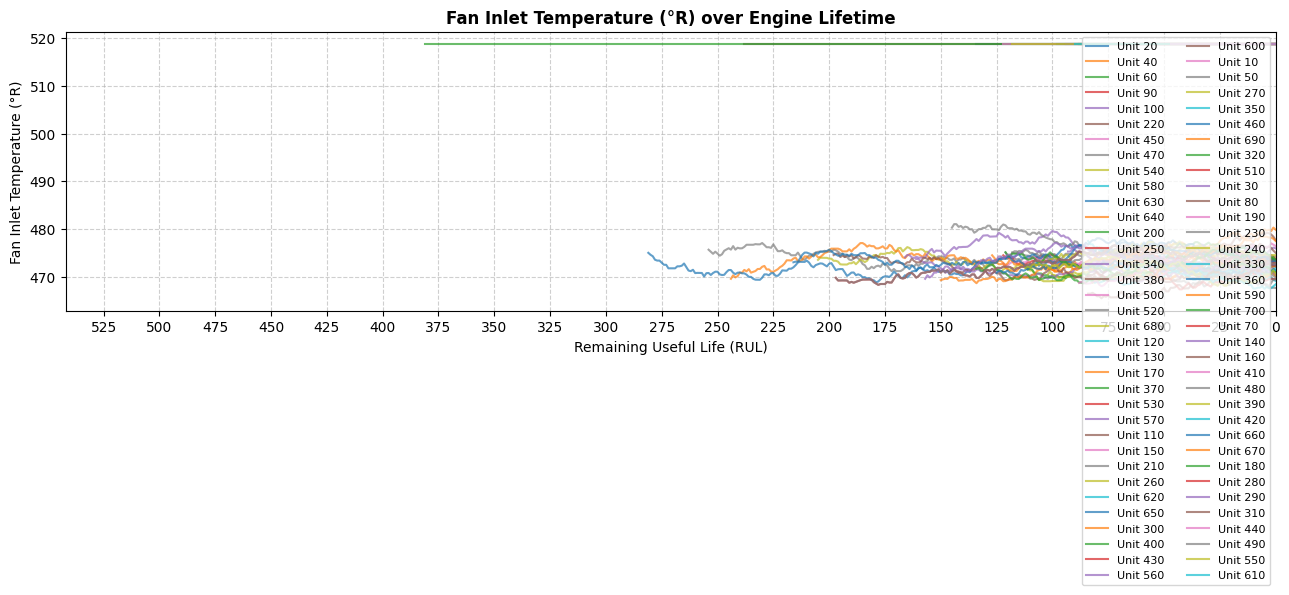

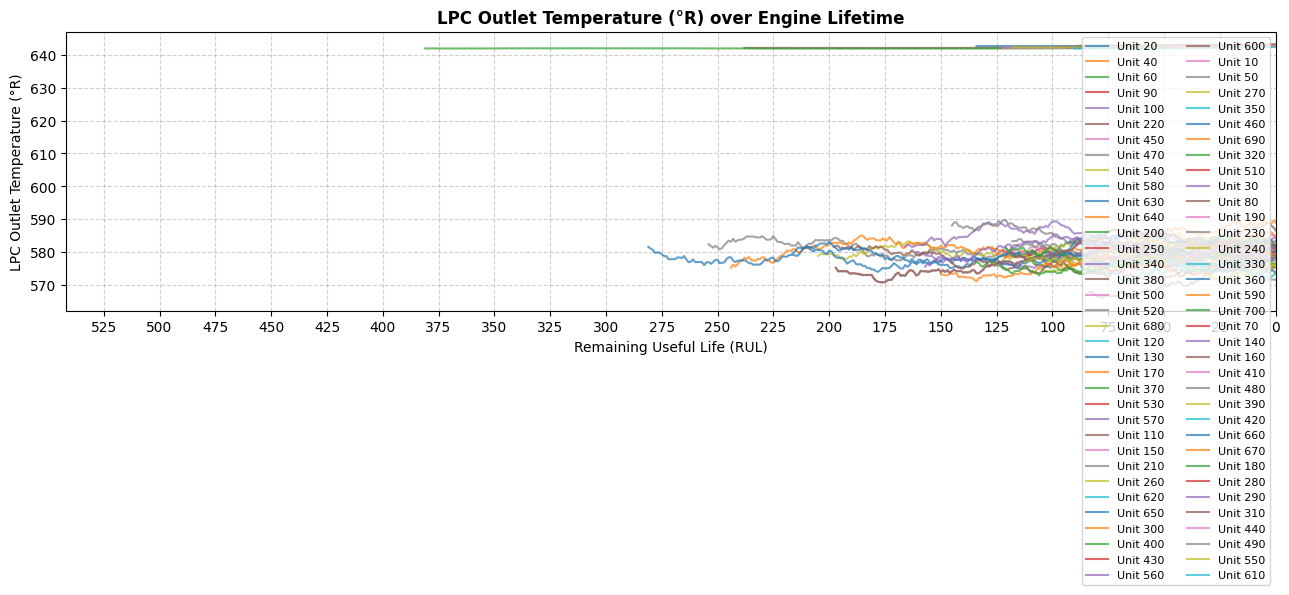

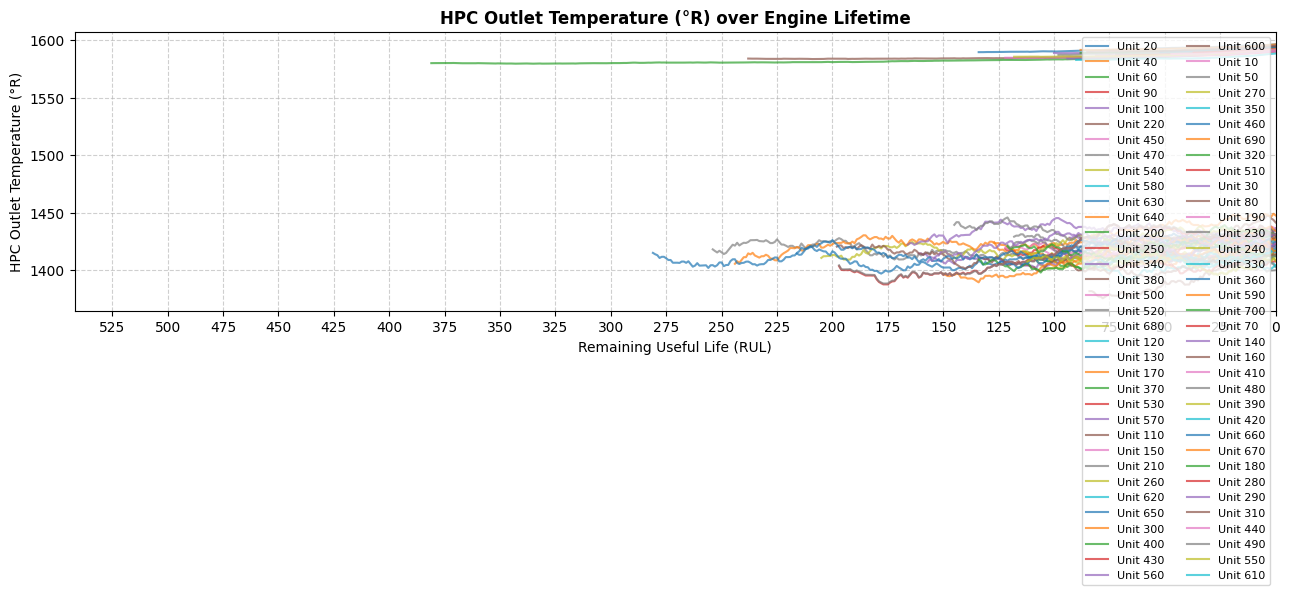

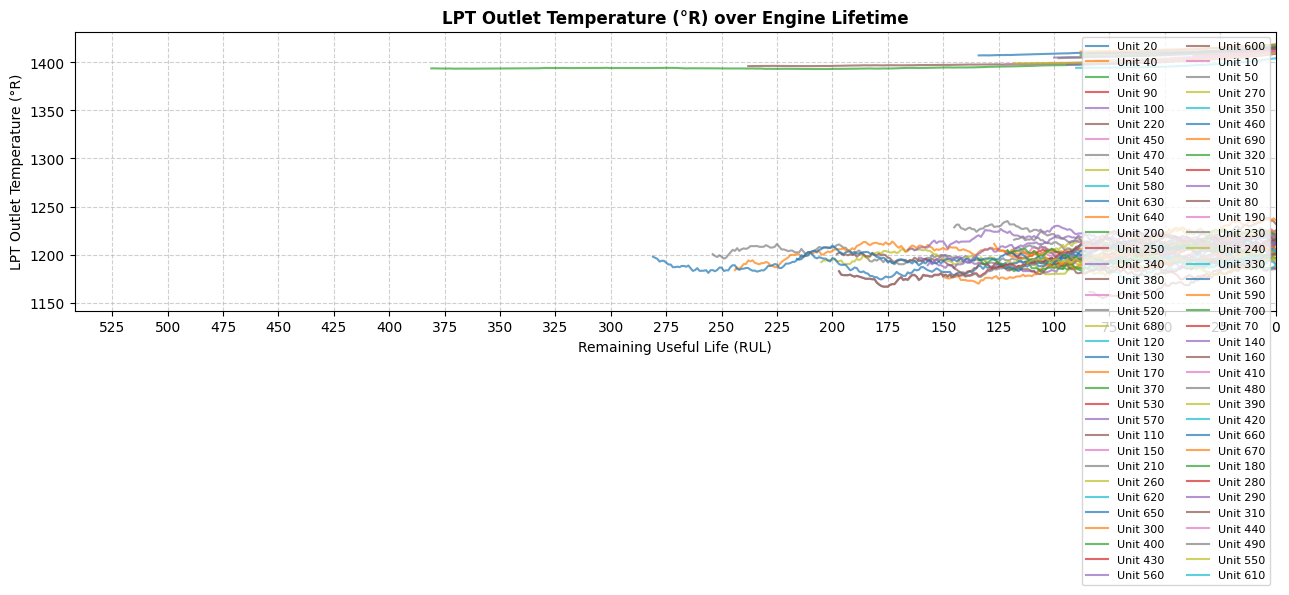

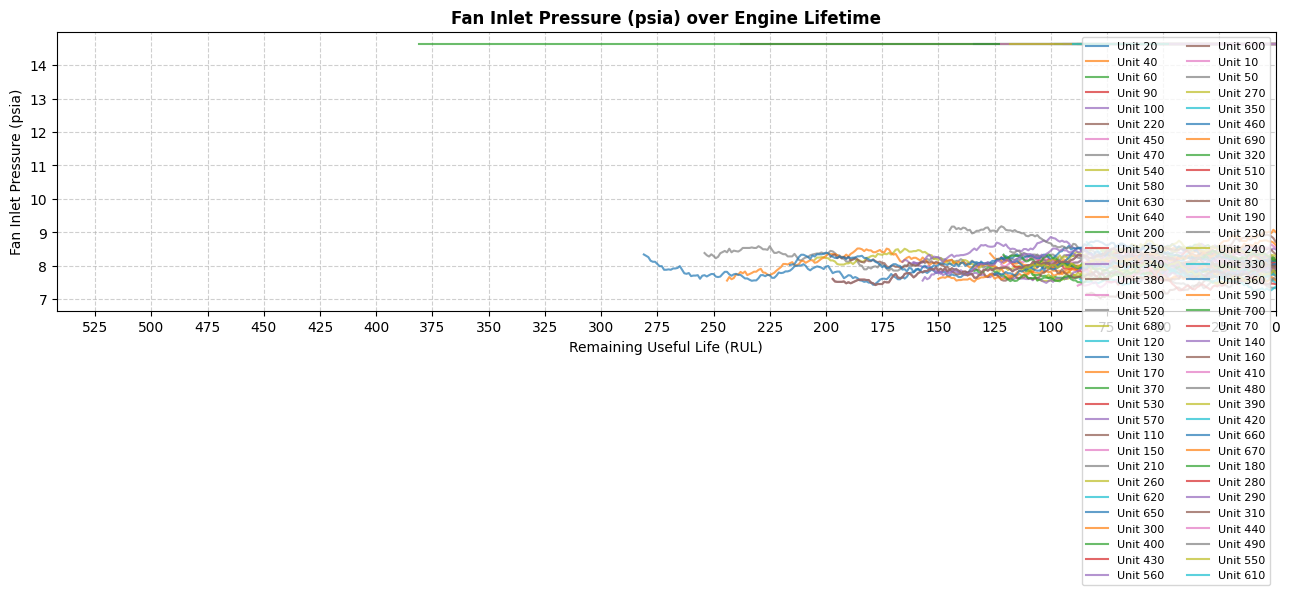

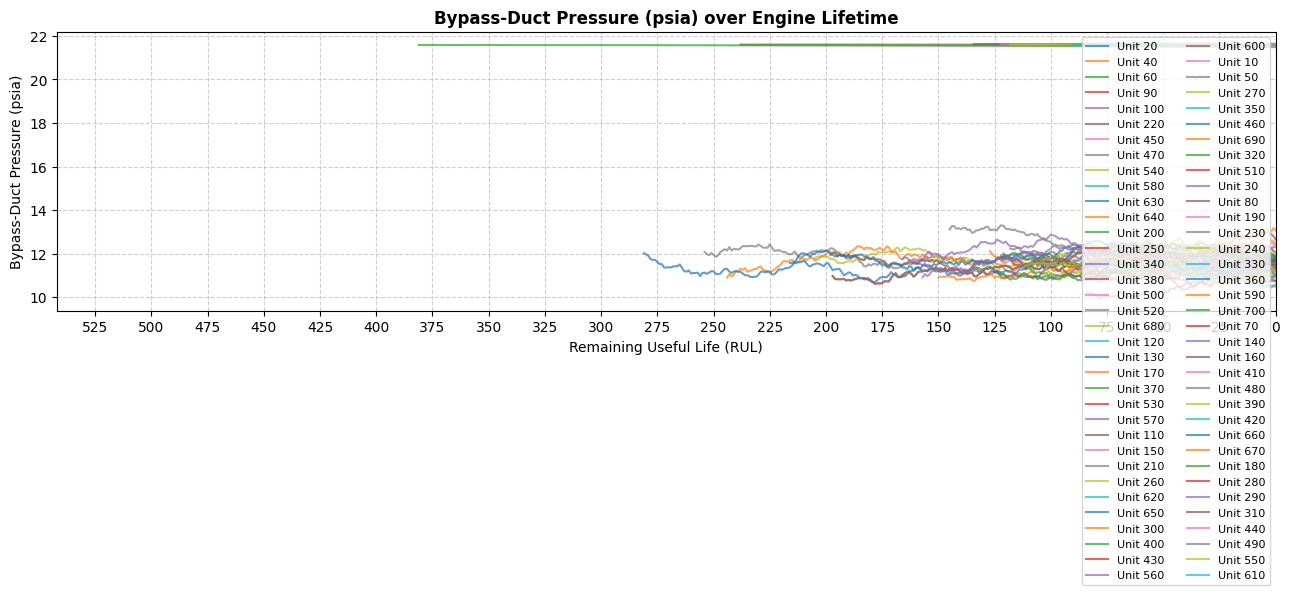

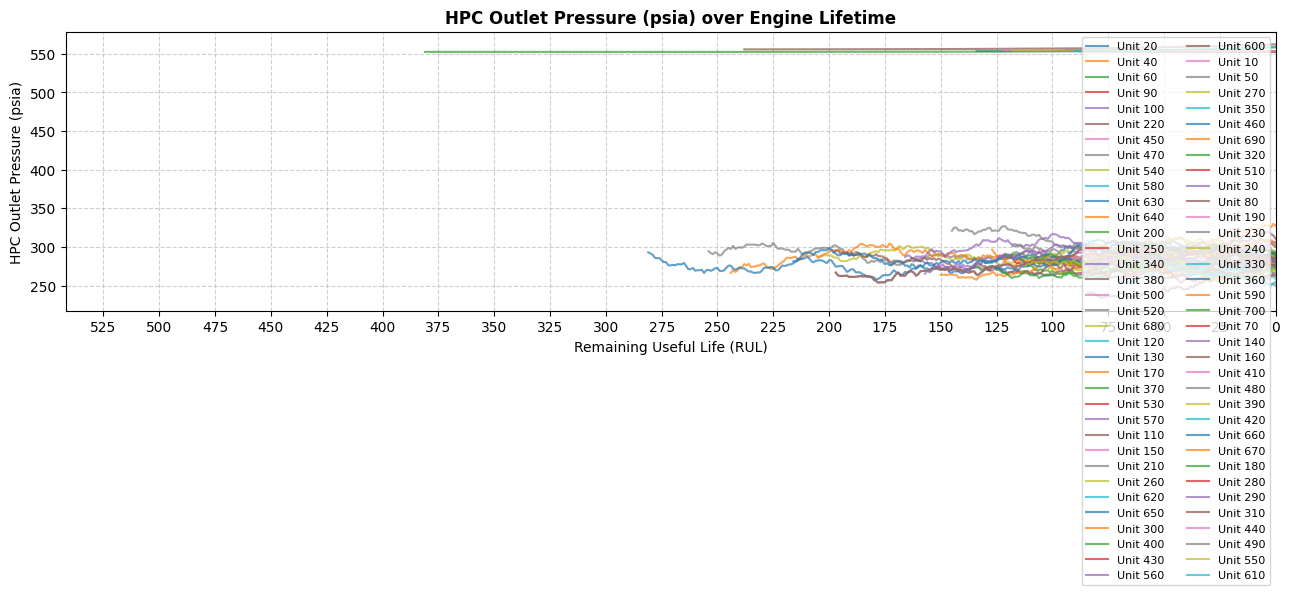

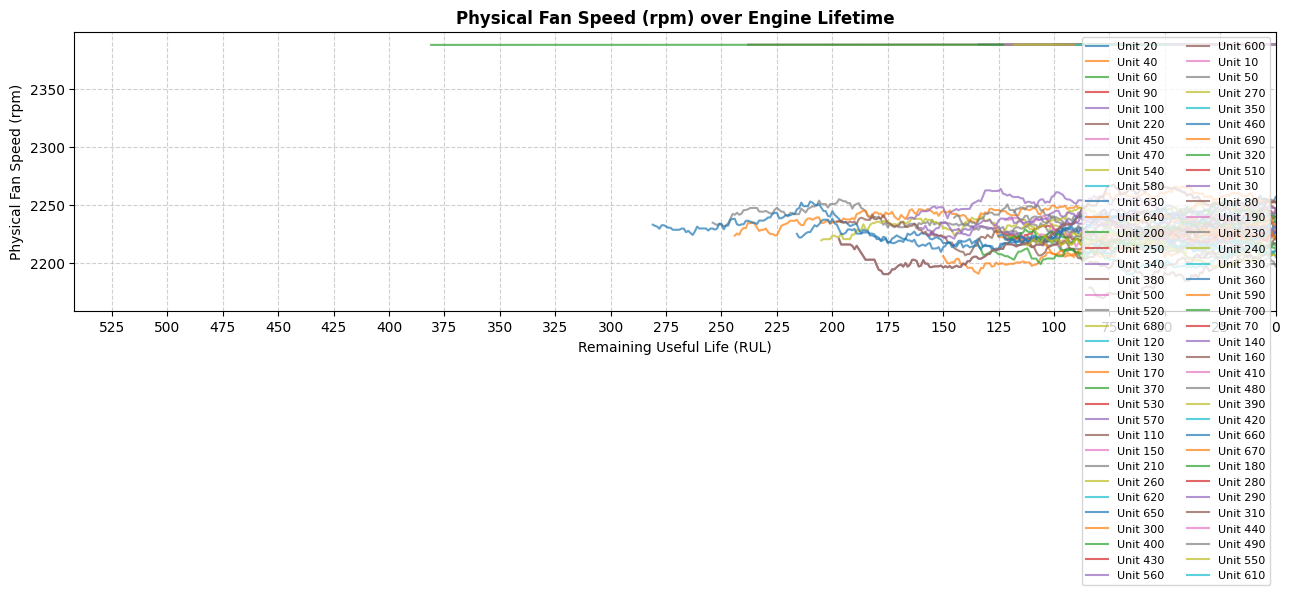

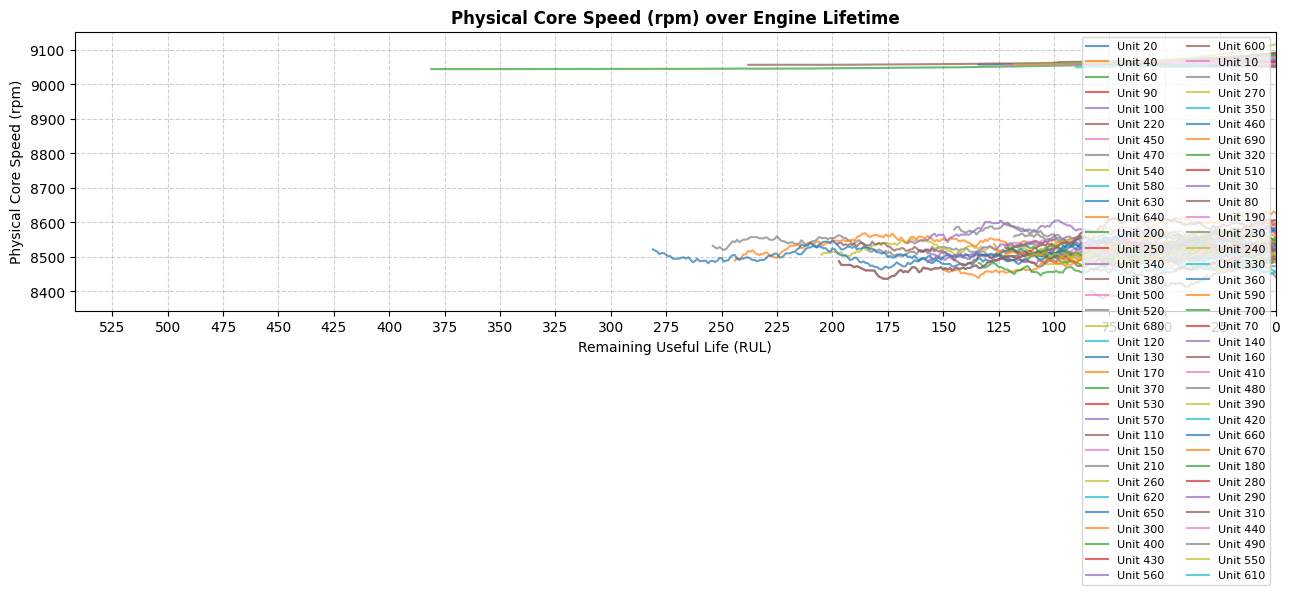

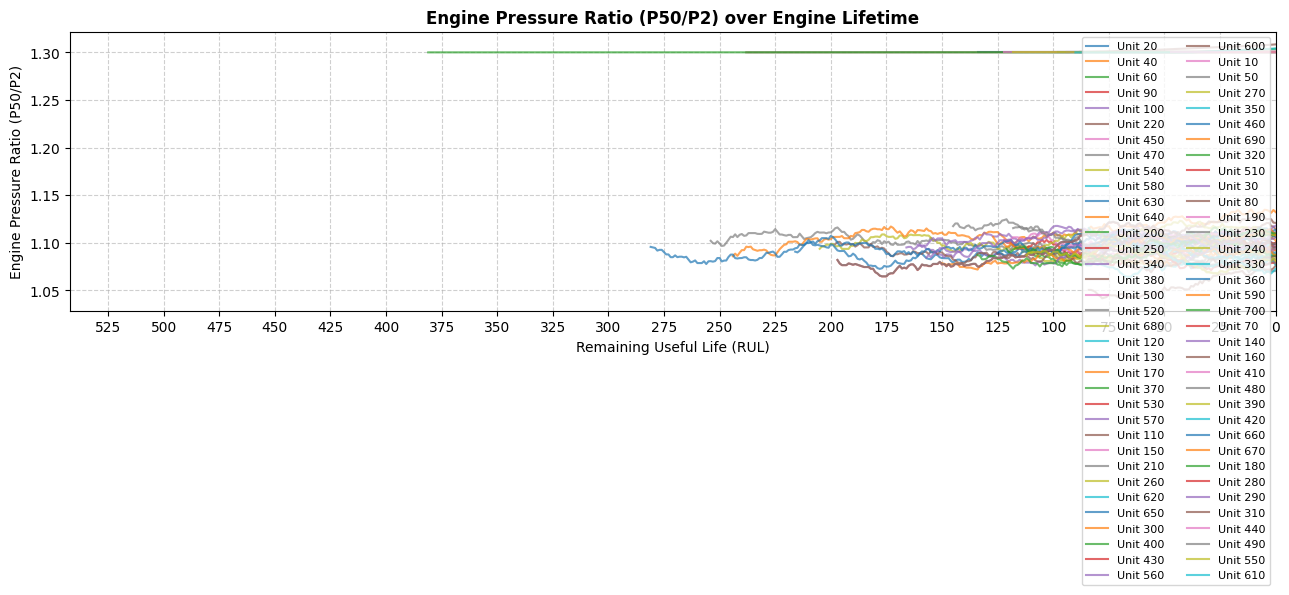

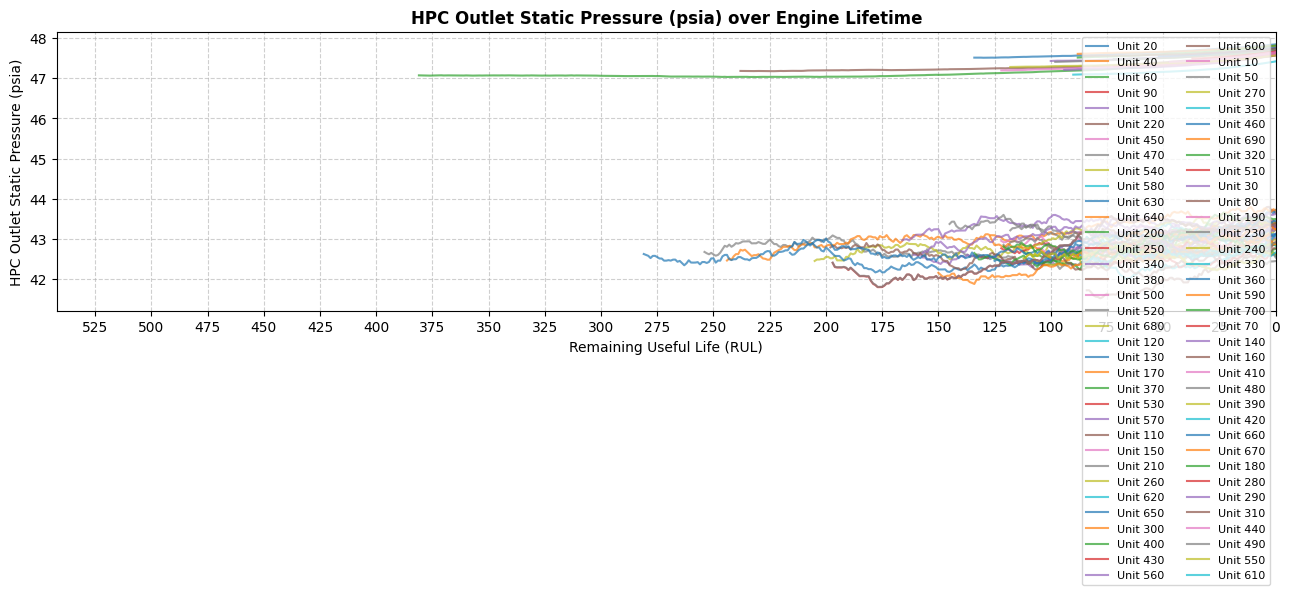

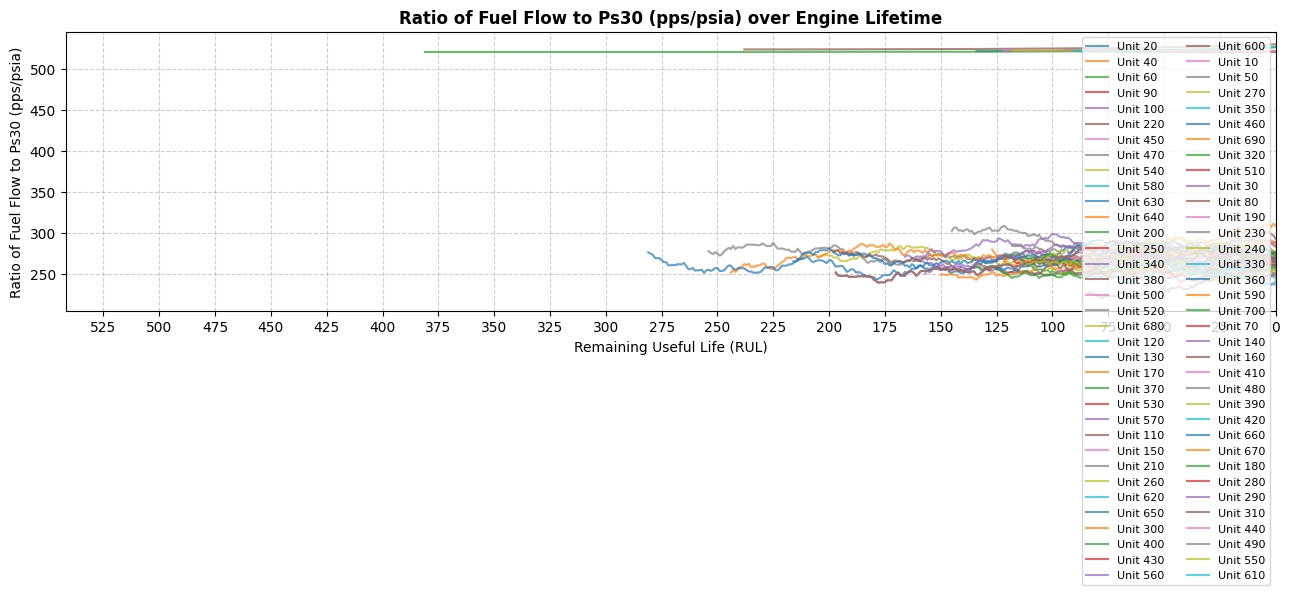

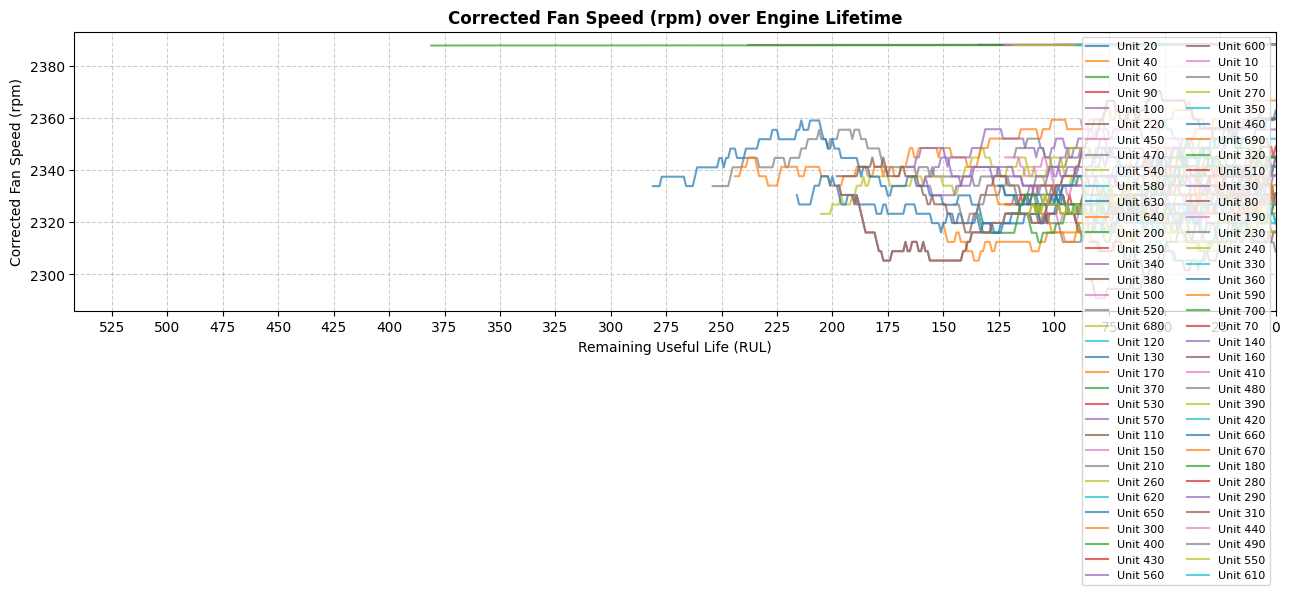

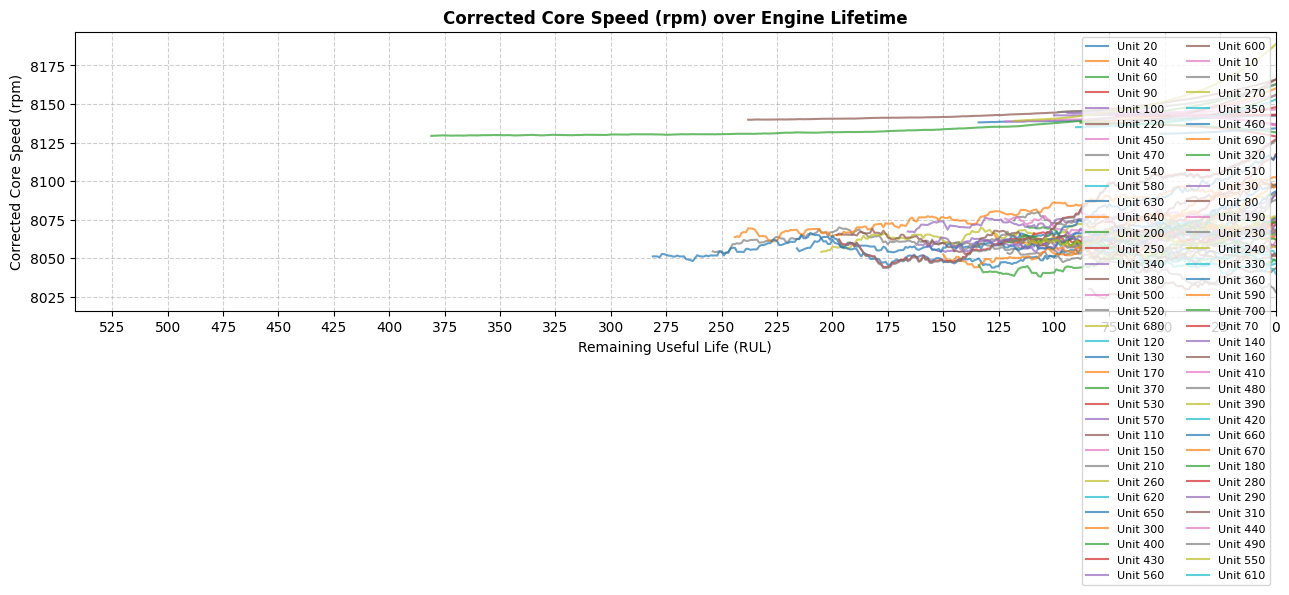

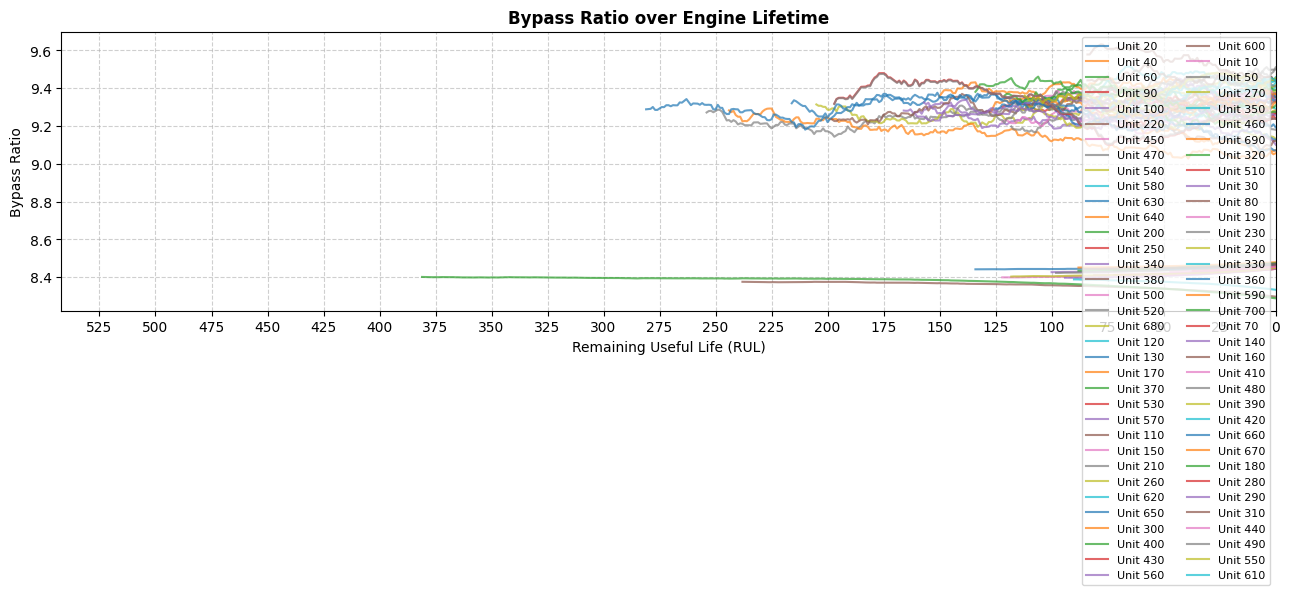

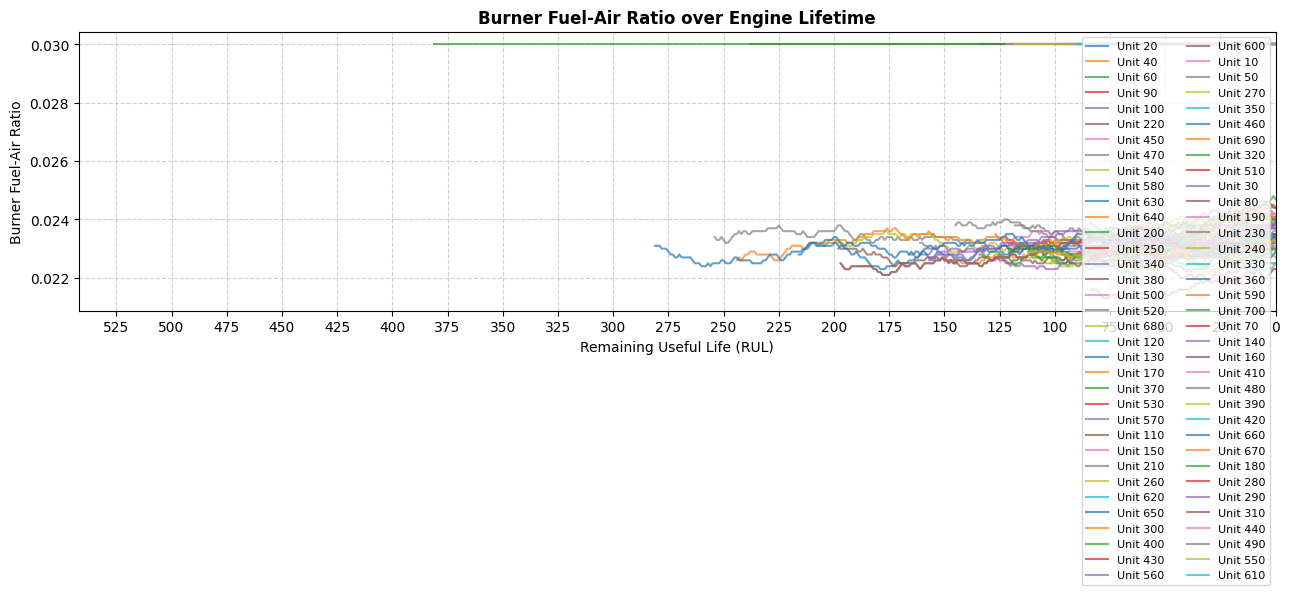

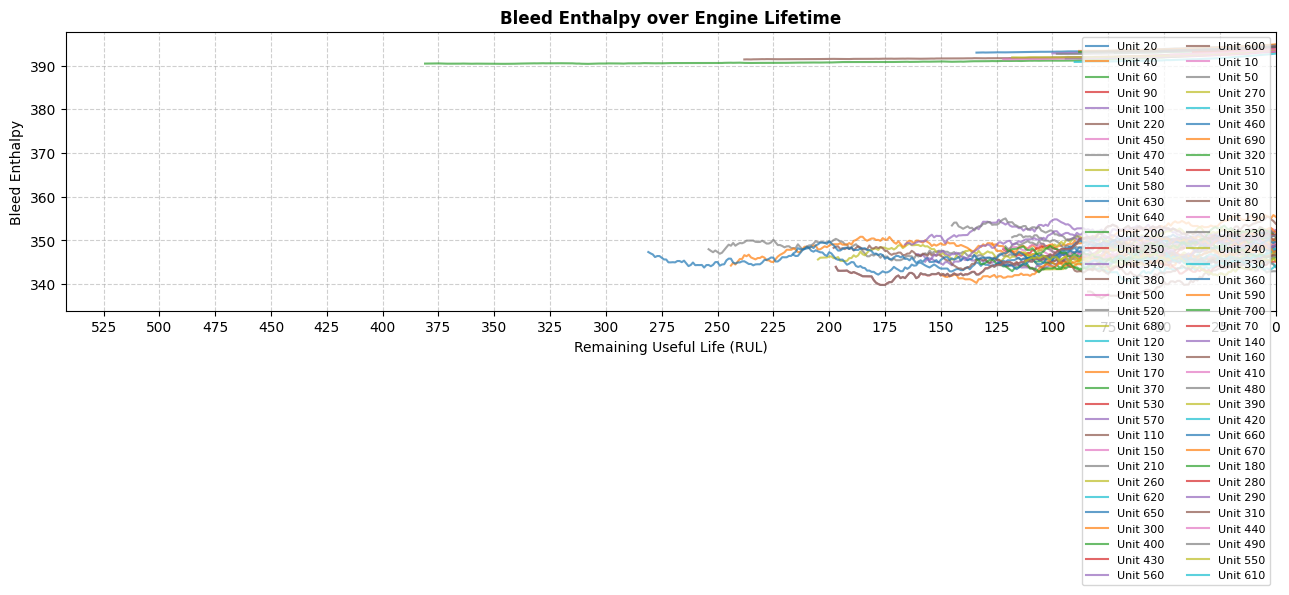

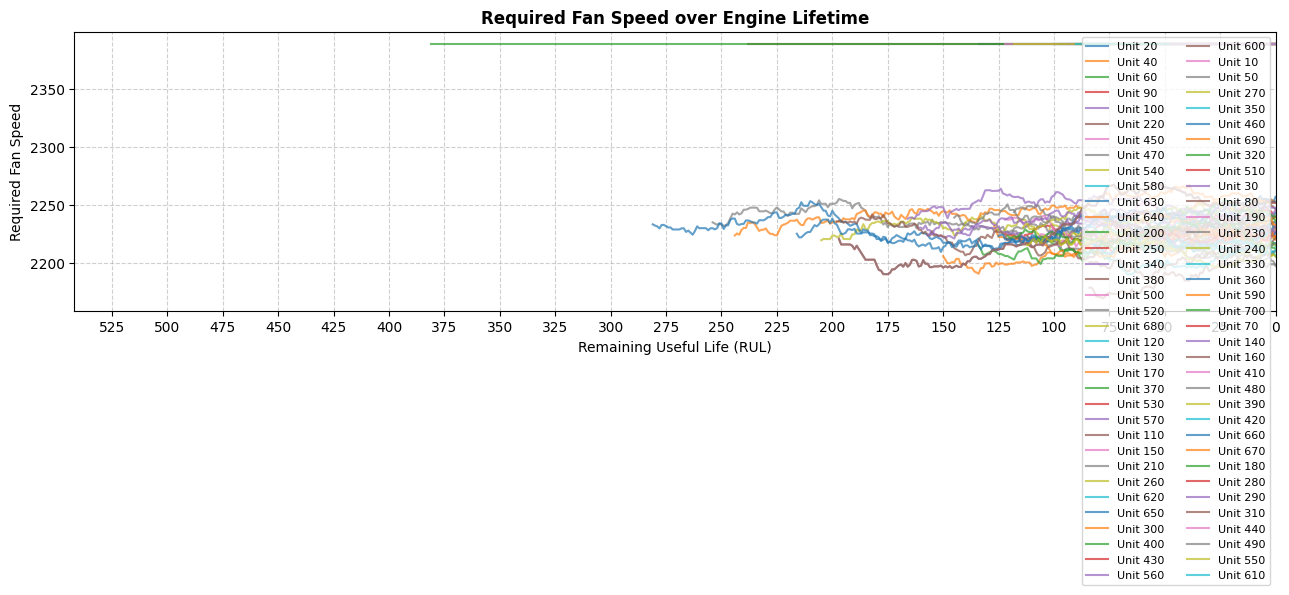

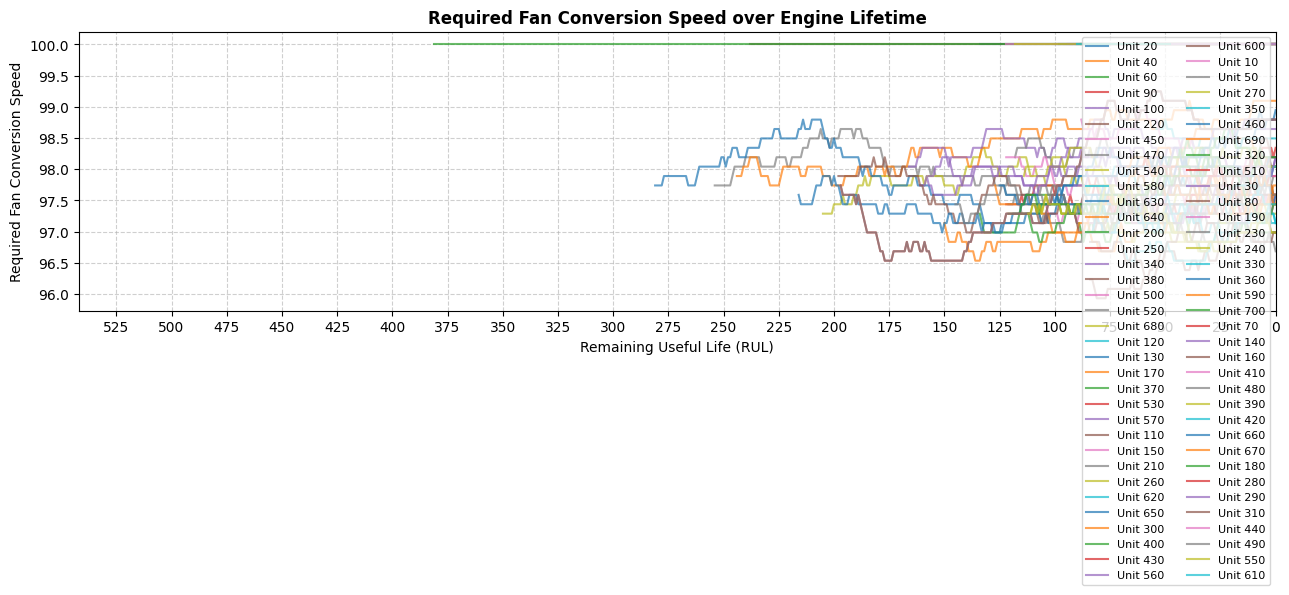

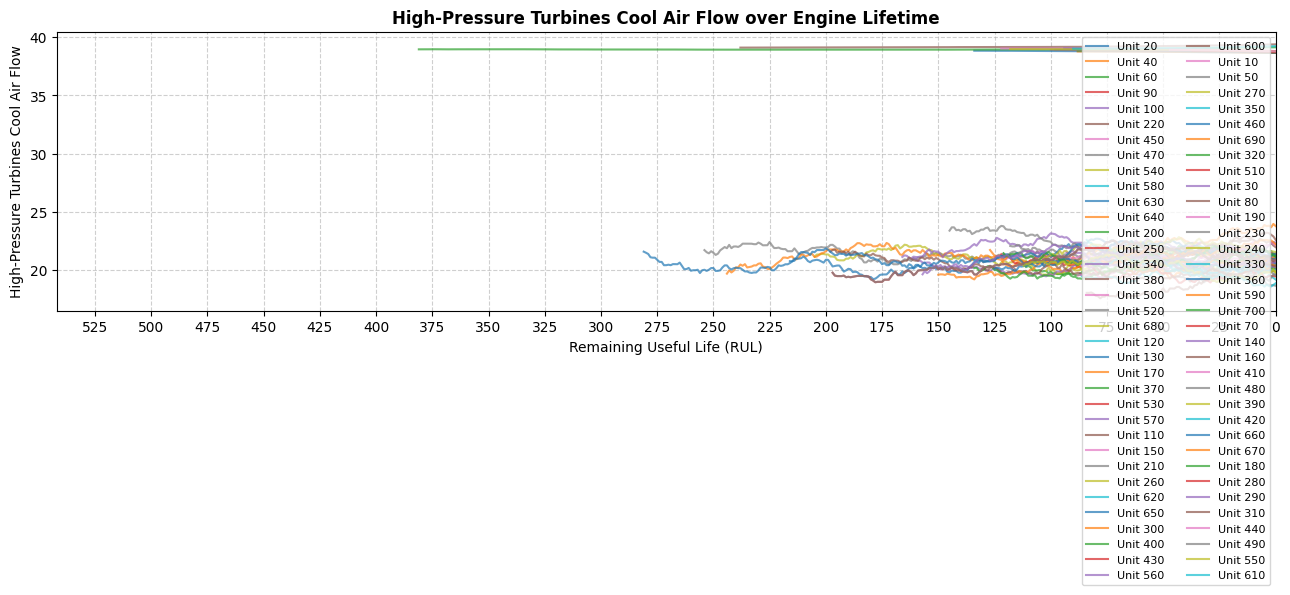

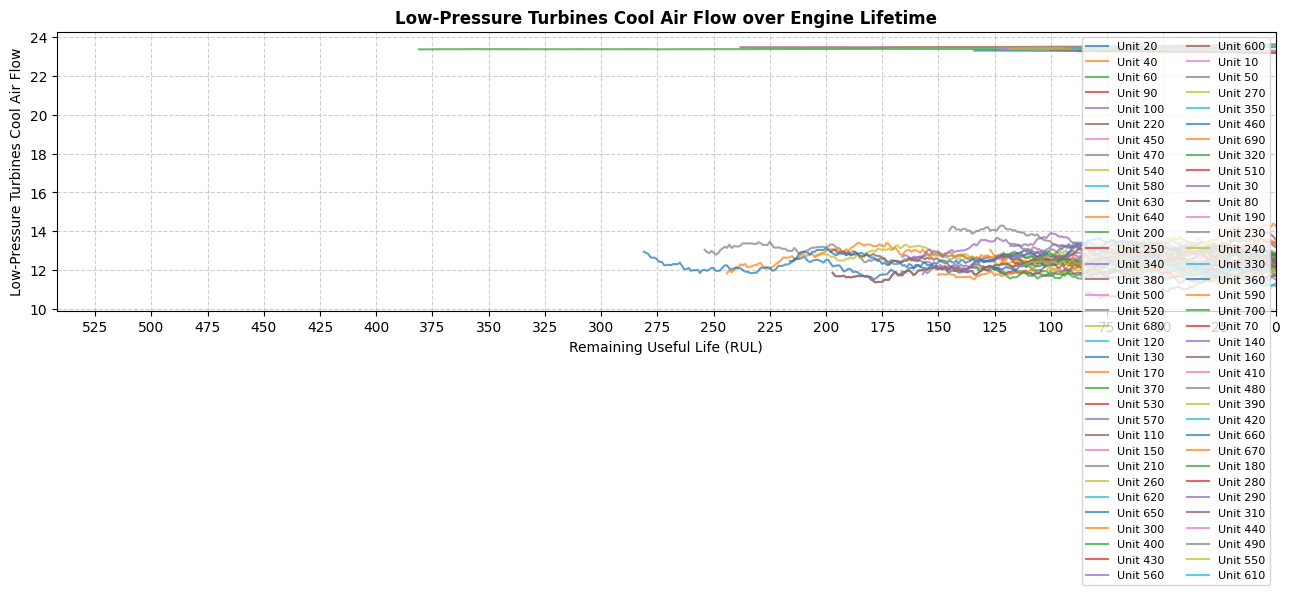

In [73]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13, 5))
    
    # Loop through a subset of engines (e.g., every 100th unit for clarity)
    for i in df['unit'].unique():
        if i % 10 == 0:  # plot every 100th engine for better visualization
            subset = df[df['unit'] == i].copy()
            plt.plot(
                subset['RUL'],
                subset[signal_name].rolling(100).mean(),
                label=f'Unit {i}',
                alpha=0.7
            )

    # Reverse x-axis so RUL counts down to zero
    plt.xlim(df['RUL'].max(), 0)
    plt.xticks(np.arange(0, df['RUL'].max() + 1, 25))
    plt.ylabel(Sensor_dic.get(signal_name, signal_name))
    plt.xlabel('Remaining Useful Life (RUL)')
    plt.title(f"{Sensor_dic.get(signal_name, signal_name)} over Engine Lifetime", fontweight='bold')
    plt.legend(loc='upper right', fontsize=8, ncol=2)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


for sensor in sensor_columns:
    try:
        plot_signal(df, Sensor_dic, sensor)
    except Exception as e:
        print(f"Skipping {sensor}: {e}")